# Growth rates from vapor pressure

In the present notebook we derive the growth rate from the vapor pressure in the proximity of a growing substrate within an epitaxial growth chamber.

The growth material is silicon carbide (SiC)

## Growth rate from source and seed partial pressures

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# Some constants related to the gas phase
Rgas = 8.314462618       # Gas constant J/mol K      !
NA = 6.02214076e23       # Avogadro Number
kboltz = Rgas/NA         # J/K
kboltz_ev = 8.1617333262 # eV/K

# Some constants related to the solid growing substrate
M_SiC =  0.0280855 + 0.0120107 # [kg/mol]
M_Si2C = 2*0.0280855 + 0.0120107 # [kg/mol]
M_SiC2 = 0.0280855 + 2*0.0120107 # [kg/mol]
T_zero_kelvin = 273.15
rho_SiC = 3210 # kg/m^3

In [3]:
# Vapor pressures follow an Arrhenius-like behaviour. These are the related prefactors and exponential constants
# for the cubic SiC.

# Avrov Arrhenius-like vapor pressures.
DelH_Si   = 2.04e4 # [K]
DelH_Si2C = 2.81e4 # [K]
DelH_SiC2 = 4.18e4 # [K]
P0_Si   = 10.82  # [K]
P0_Si2C = 13.28  # [K]
P0_SiC2 = 18.18  # [K]

# Lilov  1 1500-2000 Arrhenius-like vapor pressures.
DelH_Si_L1   = 2.74998e4 # [K]
DelH_Si2C_L1 = 3.41772e4 # [K]
DelH_SiC2_L1 = 3.40758e4 # [K]
P0_Si_L1   = 12.8114  # [K]
P0_Si2C_L1 = 15.1877  # [K]
P0_SiC2_L1 = 15.4274  # [K]

# Lilov  2 2000-2546 Arrhenius-like vapor pressures.
DelH_Si_L2   = 2.726132e4 # [K]
DelH_Si2C_L2 = 3.350033e4 # [K]
DelH_SiC2_L2 = 3.352661e4 # [K]
P0_Si_L2   = 12.6921  # [K]
P0_Si2C_L2 = 14.8493  # [K]
P0_SiC2_L2 = 15.1528  # [K]

In [4]:
def get_data_avrov_lilov(Tsource,Tseed_center,Tseed_edge):
    # This function give the <data> dictionary of "Supersaturation SiC$_2$", "Supersaturation Si$_2$C"
    # and "3C-SiC Growth rate [micron/hour]" for the Avrov and Lilov calibration of the vapor pressuare within
    # the growth chamber.
    
    Tval = np.linspace(Tseed_center, Tseed_edge, 10) # K Temperature list from the center to the wafer edge
    
    #fileout=open("SiCAvrov.txt","w")
    linenum=len(Tval)
    #print(sol1.y[0],sol1.)
    i=0
    len_SiC2 = 2e-10
    p_depSi2C = math.exp(P0_Si2C-DelH_Si2C/Tsource)   # Pascal
    loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
    p_depSiC2 = math.exp(P0_SiC2-DelH_SiC2/Tsource)   #  Pascal
    loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
    l_free = kboltz*Tsource/(pow(2.,0.5)*math.pi*len_SiC2*len_SiC2*p_depSiC2)
    #print(l_free)
    data_avrov = []
    while i <= linenum-1 :
        p_Si2C = math.exp(P0_Si2C-DelH_Si2C/Tval[i])   #  Pascal
        loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
        p_SiC2 = math.exp(P0_SiC2-DelH_SiC2/Tval[i])   # 1e5 Bar => Pascal
        loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
        Gr_SiC = (loc_depflux_Si2C-loc_evflux_Si2C+2*loc_depflux_SiC2-2*loc_evflux_SiC2)*M_SiC/rho_SiC     # m/s
        Gr_SiC = Gr_SiC*1e6*3600     # micron/h
        SupSi2C=(p_depSi2C-p_Si2C)/p_Si2C
        SupSiC2=(p_depSiC2-p_SiC2)/p_SiC2
        #fileout.write(str(Tval[i])+'  '+str(SupSiC2)+'  '+str(SupSi2C)+'  '+str(Gr_SiC)+"\n")
        data = {}
        data = {'Tval': Tval[i], 'SupSiC2': SupSiC2, 'SupSi2C': SupSi2C, 'Gr_SiC': Gr_SiC}
        data_avrov.append(data)
        i+=1
    #fileout.close()

    #fileout=open("SiCLilov.txt","w")
    linenum=len(Tval)
    #print(sol1.y[0],sol1.)
    i=0
    len_SiC2 = 2e-10
    if Tsource < 2000 :
       p_depSi2C = math.exp(P0_Si2C_L1-DelH_Si2C_L1/Tsource)   # Pascal
       loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
       p_depSiC2 = math.exp(P0_SiC2_L1-DelH_SiC2_L1/Tsource)   #  Pascal
       loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
    else :
       p_depSi2C = math.exp(P0_Si2C_L2-DelH_Si2C_L2/Tsource)   # Pascal
       loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
       p_depSiC2 = math.exp(P0_SiC2_L2-DelH_SiC2_L2/Tsource)   #  Pascal
       loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
    l_free = kboltz*Tsource/(pow(2.,0.5)*math.pi*len_SiC2*len_SiC2*p_depSiC2)
    #print(l_free)
    data_lilov = []
    while i <= linenum-1 :
        if Tval[i] < 2000 :
         p_Si2C = math.exp(P0_Si2C_L1-DelH_Si2C_L1/Tval[i])   #  Pascal
         loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
         p_SiC2 = math.exp(P0_SiC2_L1-DelH_SiC2_L1/Tval[i])   # 1e5 Bar => Pascal
         loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
        else :
         p_Si2C = math.exp(P0_Si2C_L2-DelH_Si2C_L2/Tval[i])   #  Pascal
         loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
         p_SiC2 = math.exp(P0_SiC2_L2-DelH_SiC2_L2/Tval[i])   # 1e5 Bar => Pascal
         loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
        Gr_SiC = (loc_depflux_Si2C-loc_evflux_Si2C+2*loc_depflux_SiC2-2*loc_evflux_SiC2)*M_SiC/rho_SiC     # m/s
        Gr_SiC = Gr_SiC*1e6*3600     # micron/h
        SupSi2C=(p_depSi2C-p_Si2C)/p_Si2C
        SupSiC2=(p_depSiC2-p_SiC2)/p_SiC2
        #fileout.write(str(Tval[i])+'  '+str(p_SiC2)+'  '+str(SupSiC2)+'  '+str(SupSi2C)+'  '+str(Gr_SiC)+"\n")
        data = {}
        data = {'Tval': Tval[i], 'SupSiC2': SupSiC2, 'SupSi2C': SupSi2C, 'Gr_SiC': Gr_SiC}
        data_lilov.append(data)
        i+=1
    #fileout.close()
    
    data = {'avrov': data_avrov, 'lilov': data_lilov}
    return data

In [5]:
def plot_lines(data,data_name):
    plot_names = ['SupSiC2','SupSi2C','Gr_SiC']
    data_to_plot = data[data_name]

    temp_vect = []
    for x in data_to_plot:
        temp_vect.append(x['Tval'])

    fig = plt.figure(figsize=(30,8.5))
    plt.rcParams.update({'font.size':35})
    plt.rcParams['axes.linewidth'] = 3.0

    i=1
    for name in plot_names:
        vect = []
        for x in data_to_plot:
            vect.append(x[name])
        ax1 = fig.add_subplot(1,len(plot_names),i)
        plt.plot(temp_vect, vect)
        plt.xlabel('Temperature [k]', size=20)
        if name == 'SupSiC2':
            plt.ylabel('Supersaturation SiC$_2$', size=20)
        elif name == 'SupSi2C':
            plt.ylabel('Supersaturation Si$_2$C', size=20)
        elif name == 'Gr_SiC':
            plt.ylabel('3C-SiC Growth rate [micron/hour]', size=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        plt.tick_params(axis='x', direction="in",   top=True, width=3, pad=10)
        plt.tick_params(axis='y', direction="in", right=True, width=3, pad=10)

        i+=1
        #plt.legend(loc=(0.46, 0.58))
        #plt.savefig(name+'.pdf') 
    plt.show()

In [6]:
# Data extracted from the excel file from Peter Wellmann "Temperature vs Growth rate.xlsx" 21 Oct 2020
data_samples = {}
data_samples['151'] = {'Power': 5.45, 'T_seed_middle': 1880.00, 'T_seed_edge': 1883.51, 'T_source_middle': 1887.63, 'T_source_edge': 1886.94, 'Exp-Growth-Rate': 101}
data_samples['148'] = {'Power': 5.85, 'T_seed_middle': 1933.26, 'T_seed_edge': 1936.73, 'T_source_middle': 1940.95, 'T_source_edge': 1940.29, 'Exp-Growth-Rate': 208}
data_samples['149'] = {'Power': 5.90, 'T_seed_middle': 1939.64, 'T_seed_edge': 1943.10, 'T_source_middle': 1947.34, 'T_source_edge': 1946.68, 'Exp-Growth-Rate': 230}
data_samples['152'] = {'Power': 6.00, 'T_seed_middle': 1952.39, 'T_seed_edge': 1955.84, 'T_source_middle': 1960.10, 'T_source_edge': 1959.45, 'Exp-Growth-Rate': 231}
data_samples['153'] = {'Power': 6.10, 'T_seed_middle': 1964.78, 'T_seed_edge': 1968.22, 'T_source_middle': 1972.50, 'T_source_edge': 1971.85, 'Exp-Growth-Rate': 287}

In [7]:
# Rigid shift for all source, seed-middle and seed-edge temperature
delta_T = 0.0

In [8]:
data_names = ['avrov','lilov']

Process ID: 151
The chamber power is: 5.45 kW
Seed-middle temperature: 2153.15 [K]
Seed-edge temperature: 2156.66 [K]
Source temperature: 2160.435 [K]
Source - Seed-center temperature: 7.2849999999998545 [K]
Source - Seed-edge temperature: 3.775000000000091 [K]

Calibration for vapor pressure: avrov


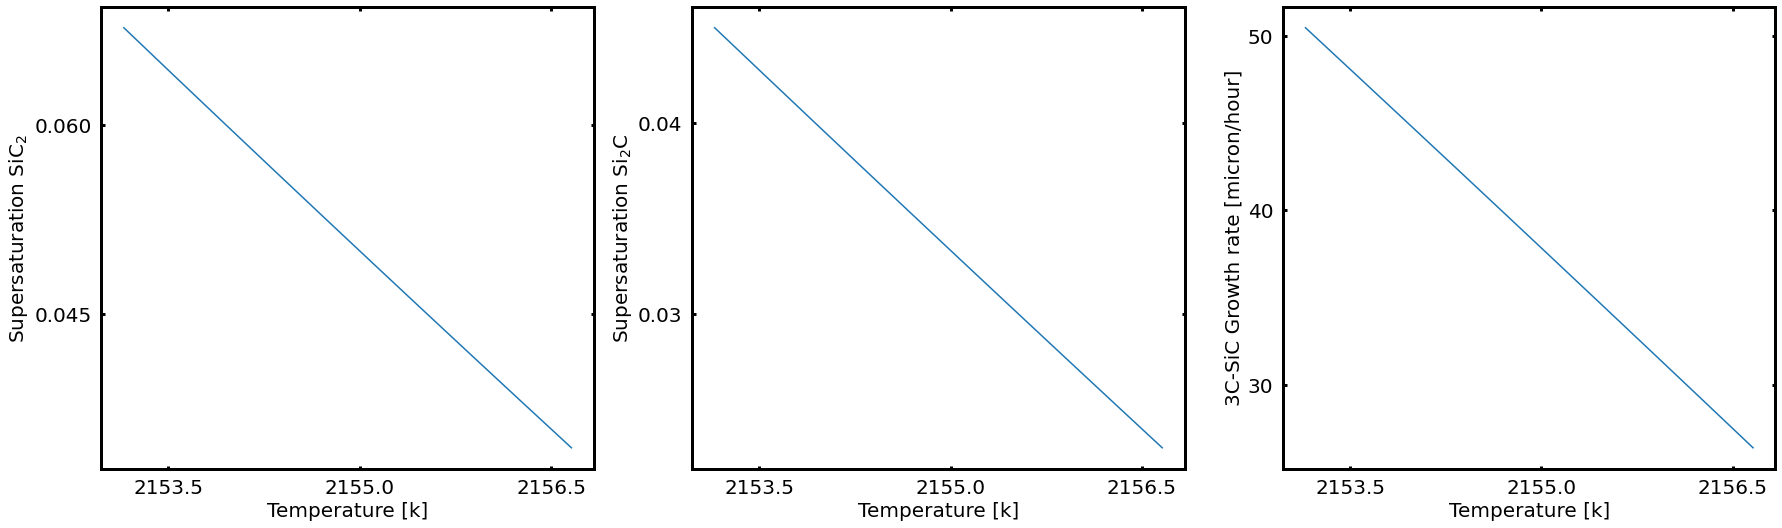

Calibration for vapor pressure: lilov


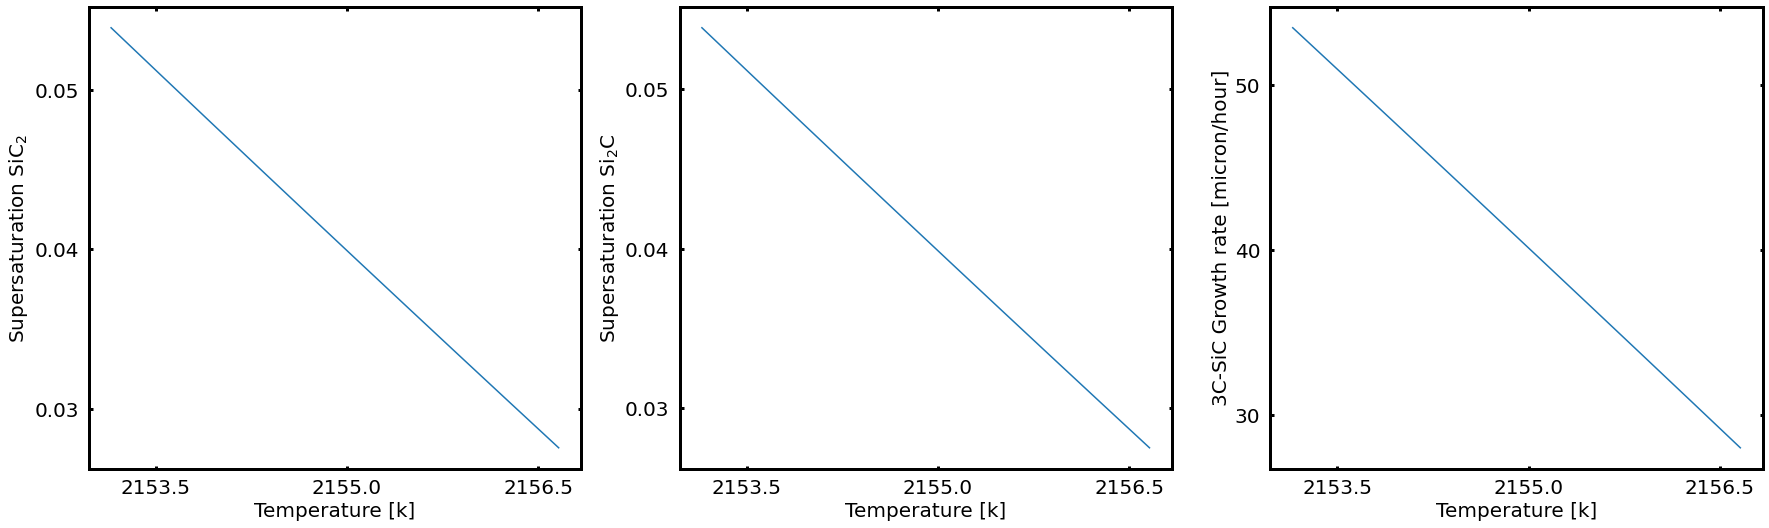


Process ID: 148
The chamber power is: 5.85 kW
Seed-middle temperature: 2206.41 [K]
Seed-edge temperature: 2209.88 [K]
Source temperature: 2213.77 [K]
Source - Seed-center temperature: 7.360000000000127 [K]
Source - Seed-edge temperature: 3.8899999999998727 [K]

Calibration for vapor pressure: avrov


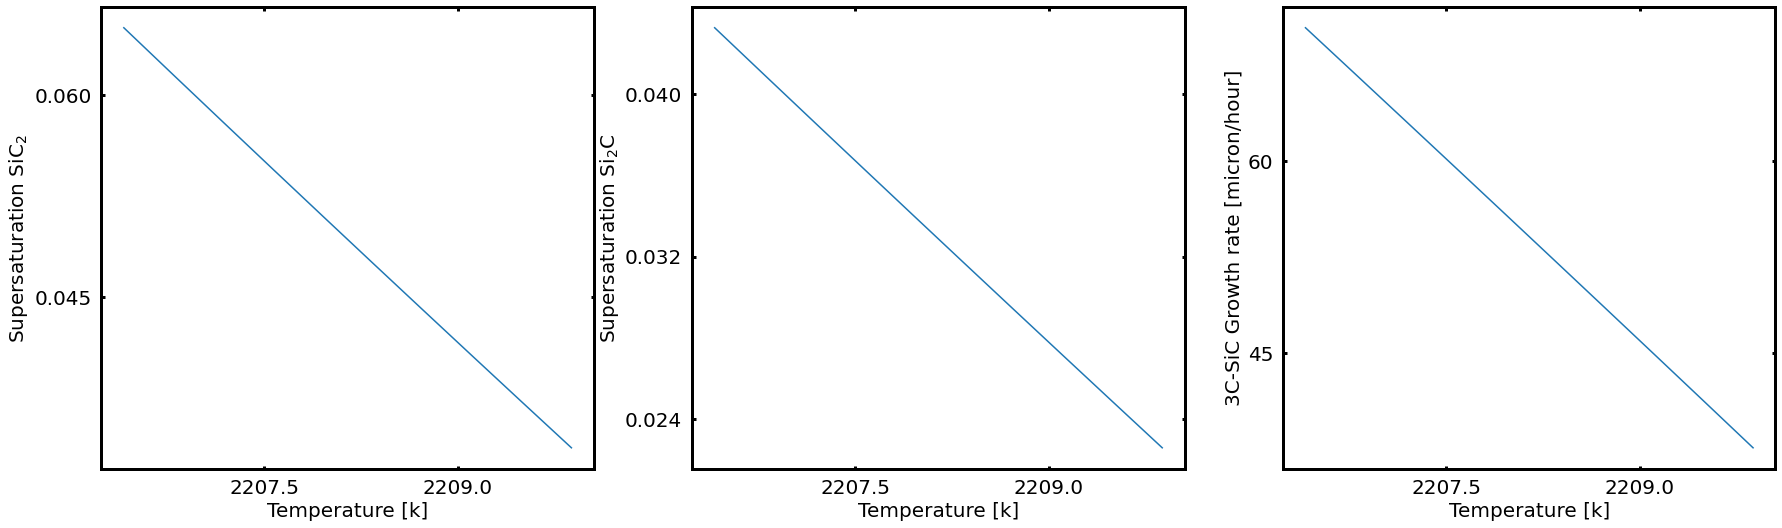

Calibration for vapor pressure: lilov


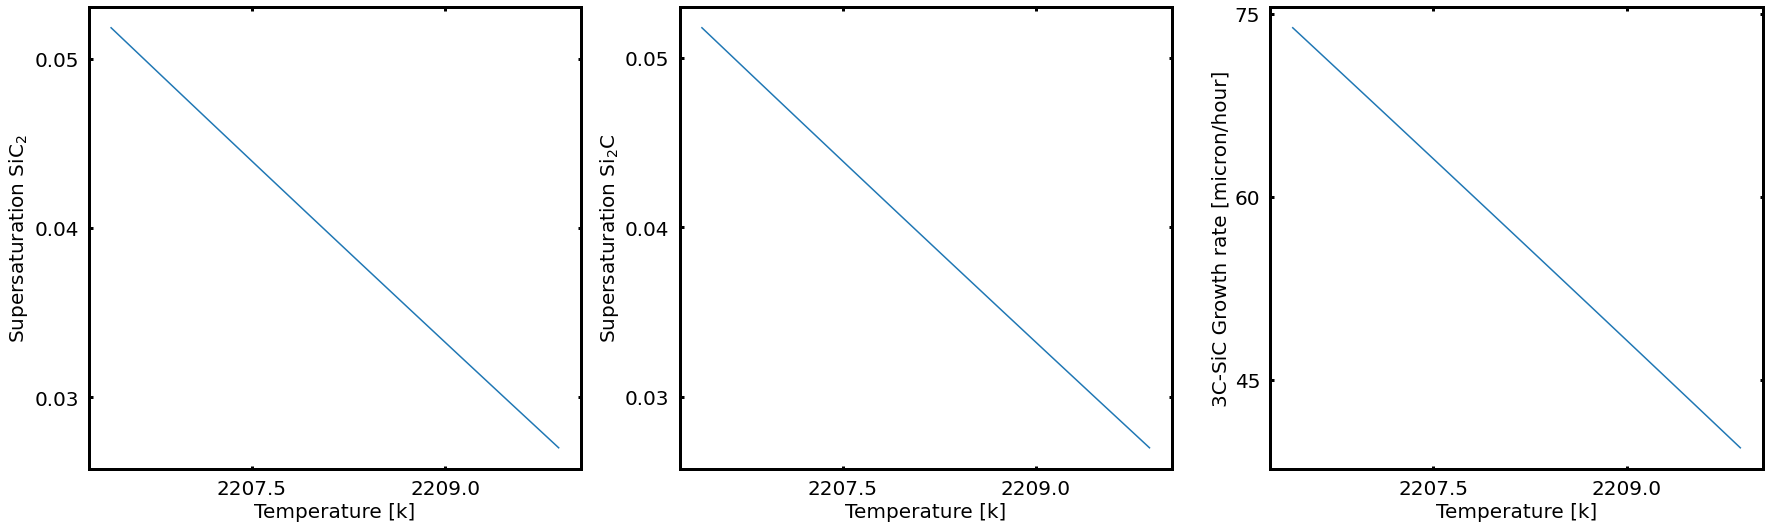


Process ID: 149
The chamber power is: 5.9 kW
Seed-middle temperature: 2212.79 [K]
Seed-edge temperature: 2216.25 [K]
Source temperature: 2220.16 [K]
Source - Seed-center temperature: 7.369999999999891 [K]
Source - Seed-edge temperature: 3.9099999999998545 [K]

Calibration for vapor pressure: avrov


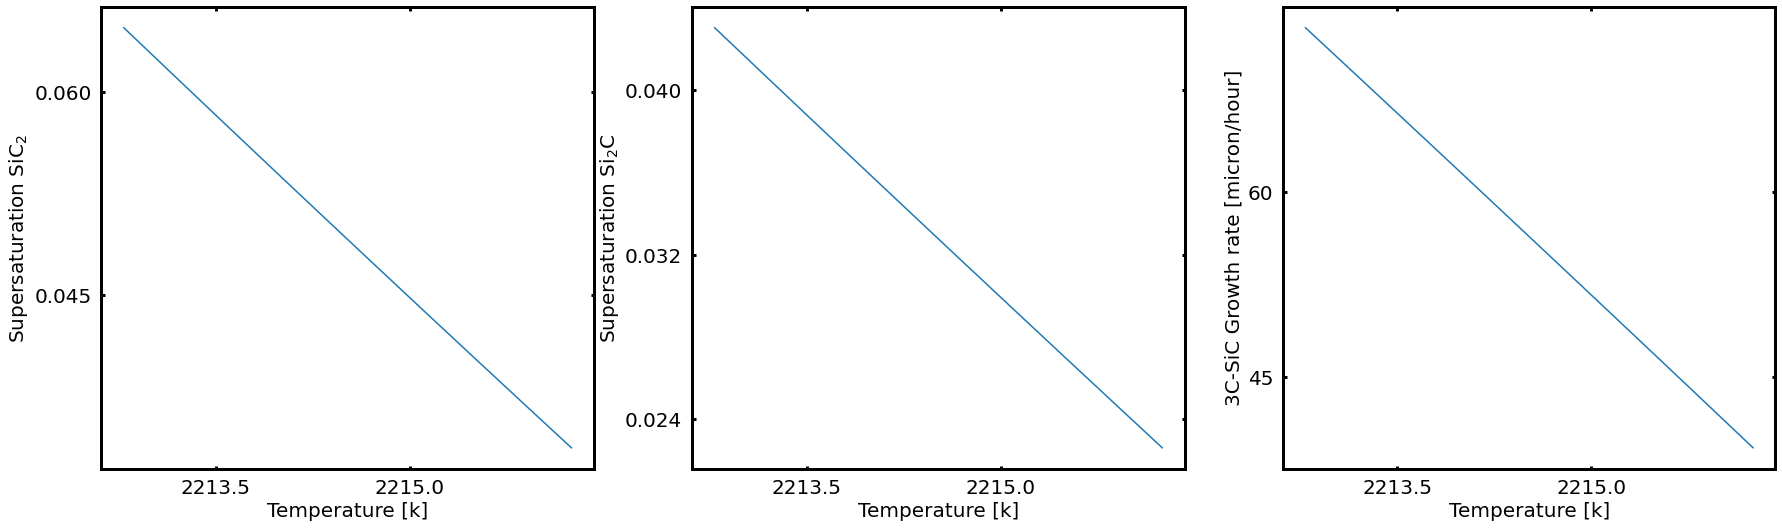

Calibration for vapor pressure: lilov


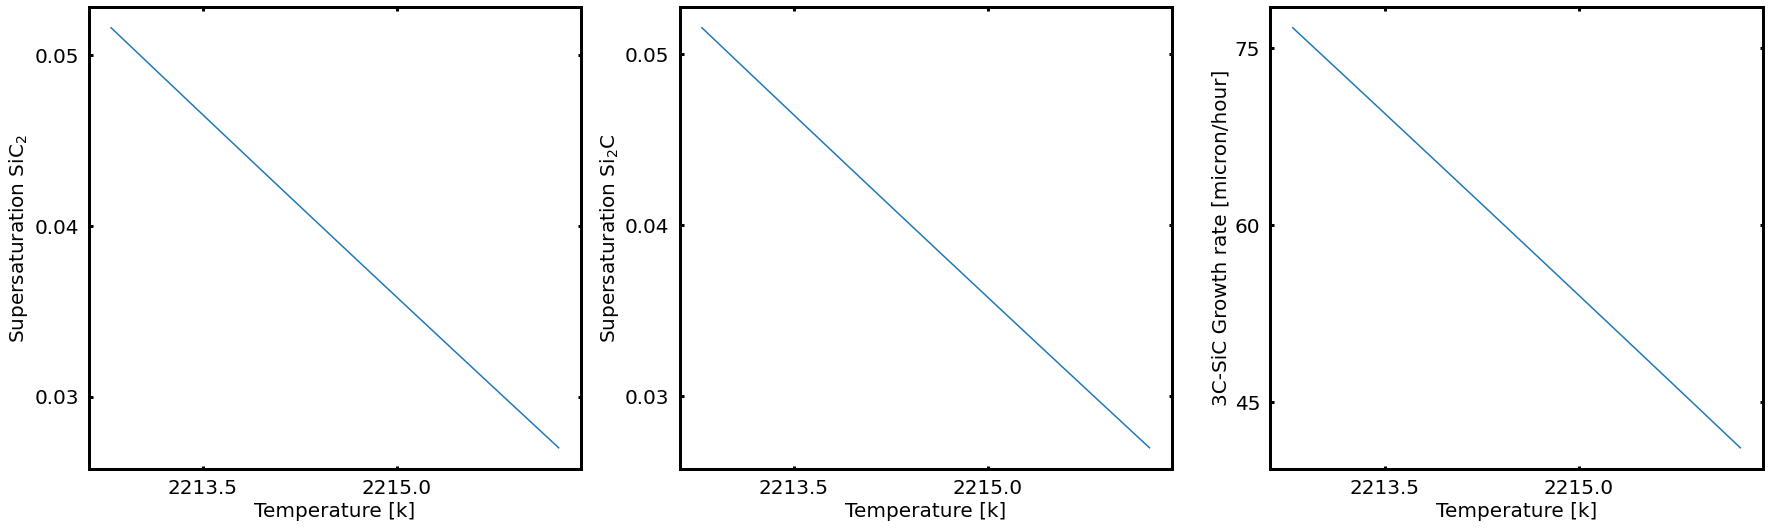


Process ID: 152
The chamber power is: 6.0 kW
Seed-middle temperature: 2225.54 [K]
Seed-edge temperature: 2228.99 [K]
Source temperature: 2232.925 [K]
Source - Seed-center temperature: 7.385000000000218 [K]
Source - Seed-edge temperature: 3.9350000000004 [K]

Calibration for vapor pressure: avrov


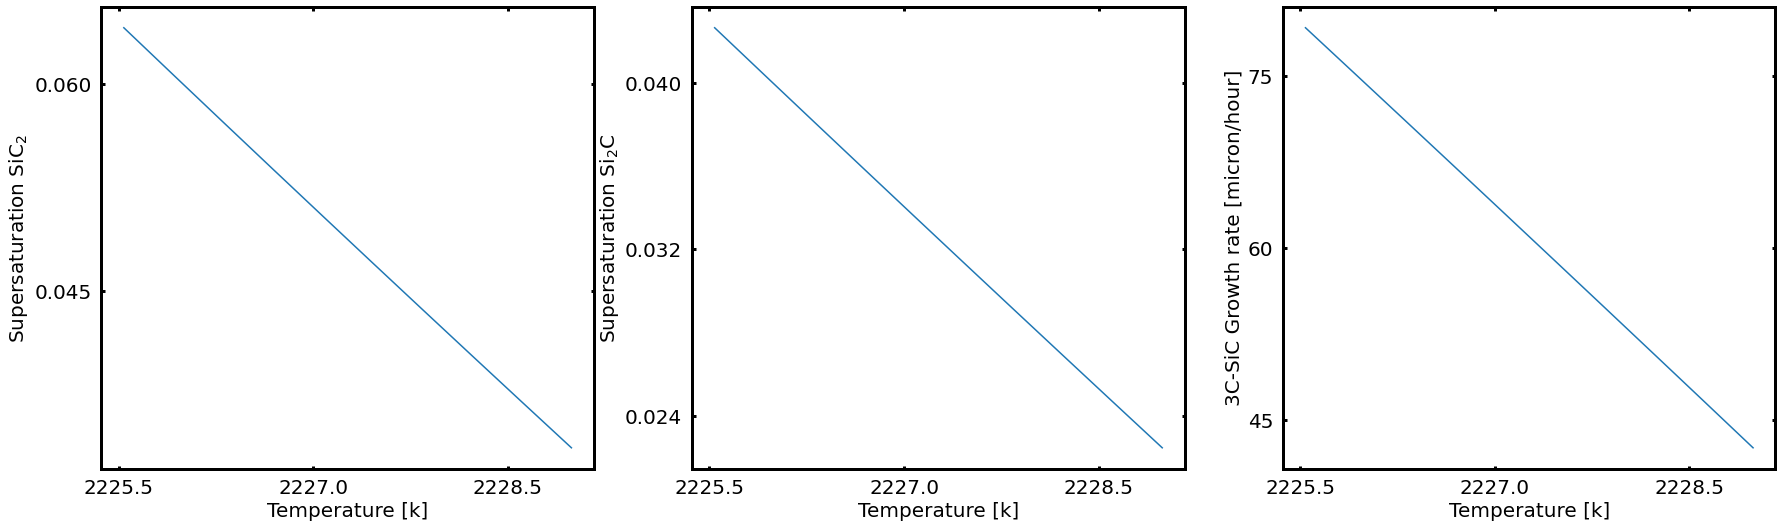

Calibration for vapor pressure: lilov


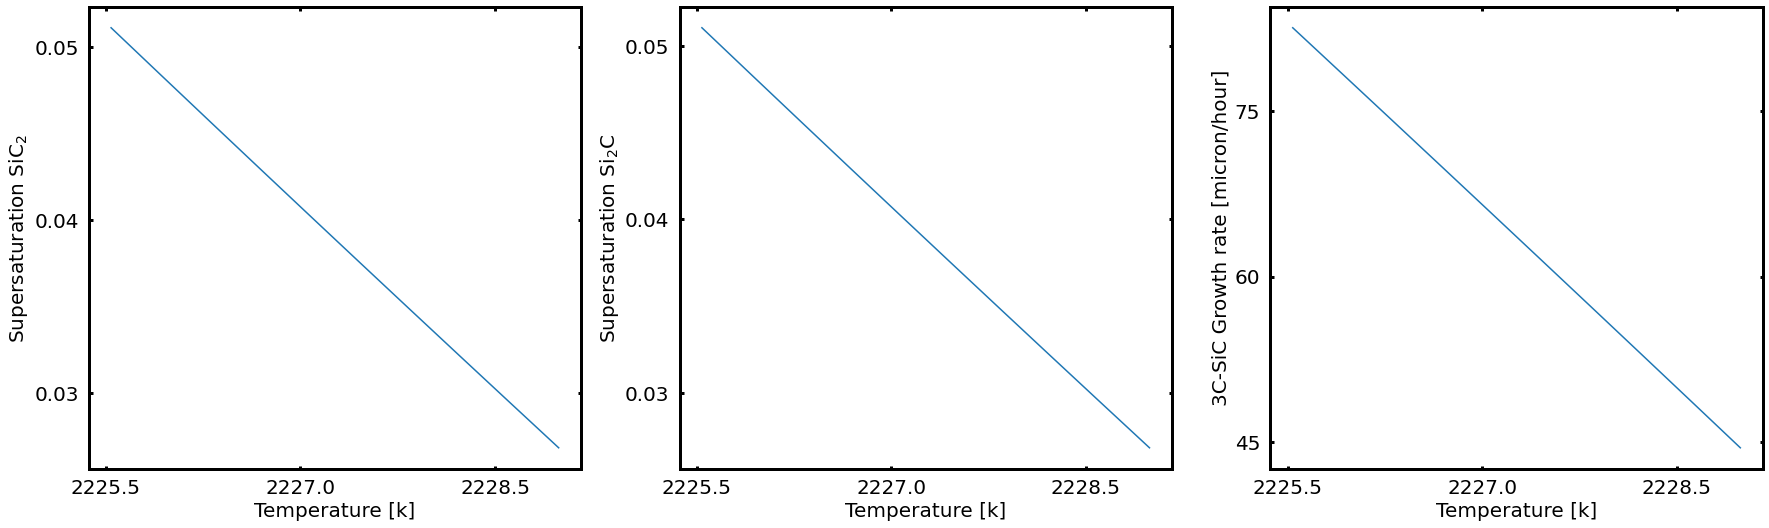


Process ID: 153
The chamber power is: 6.1 kW
Seed-middle temperature: 2237.93 [K]
Seed-edge temperature: 2241.37 [K]
Source temperature: 2245.325 [K]
Source - Seed-center temperature: 7.394999999999982 [K]
Source - Seed-edge temperature: 3.9549999999999272 [K]

Calibration for vapor pressure: avrov


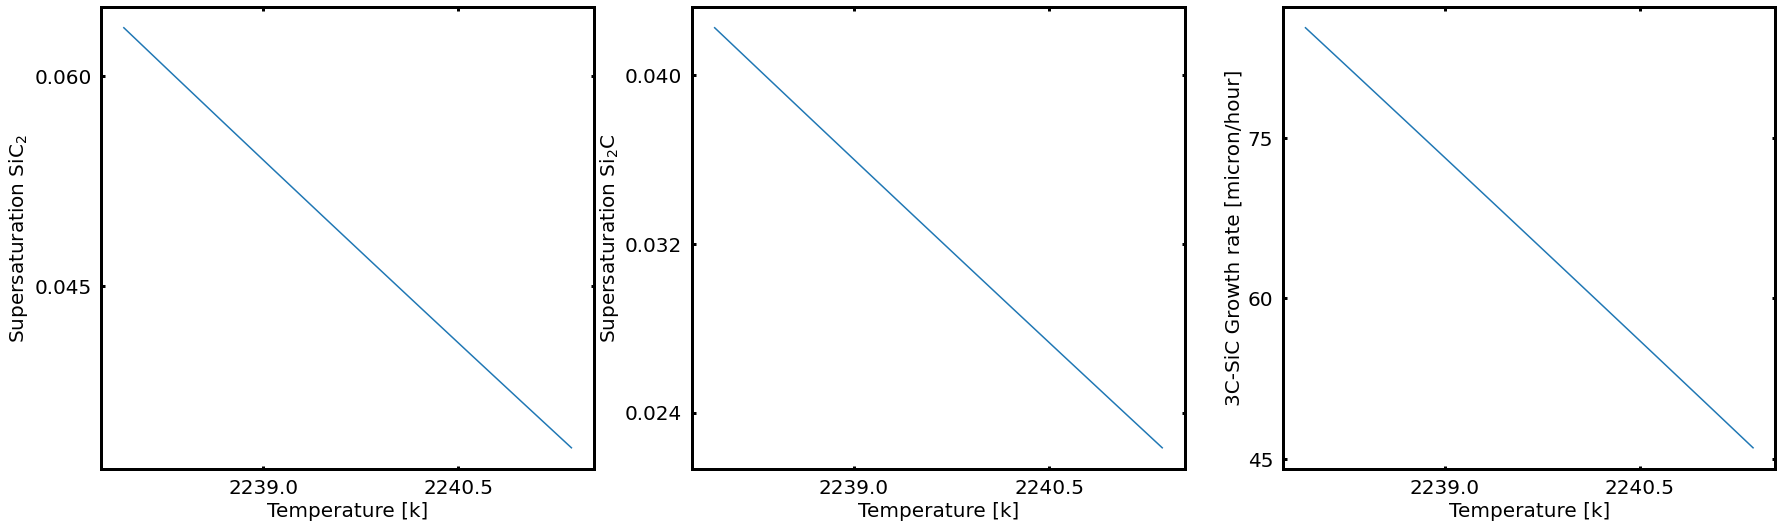

Calibration for vapor pressure: lilov


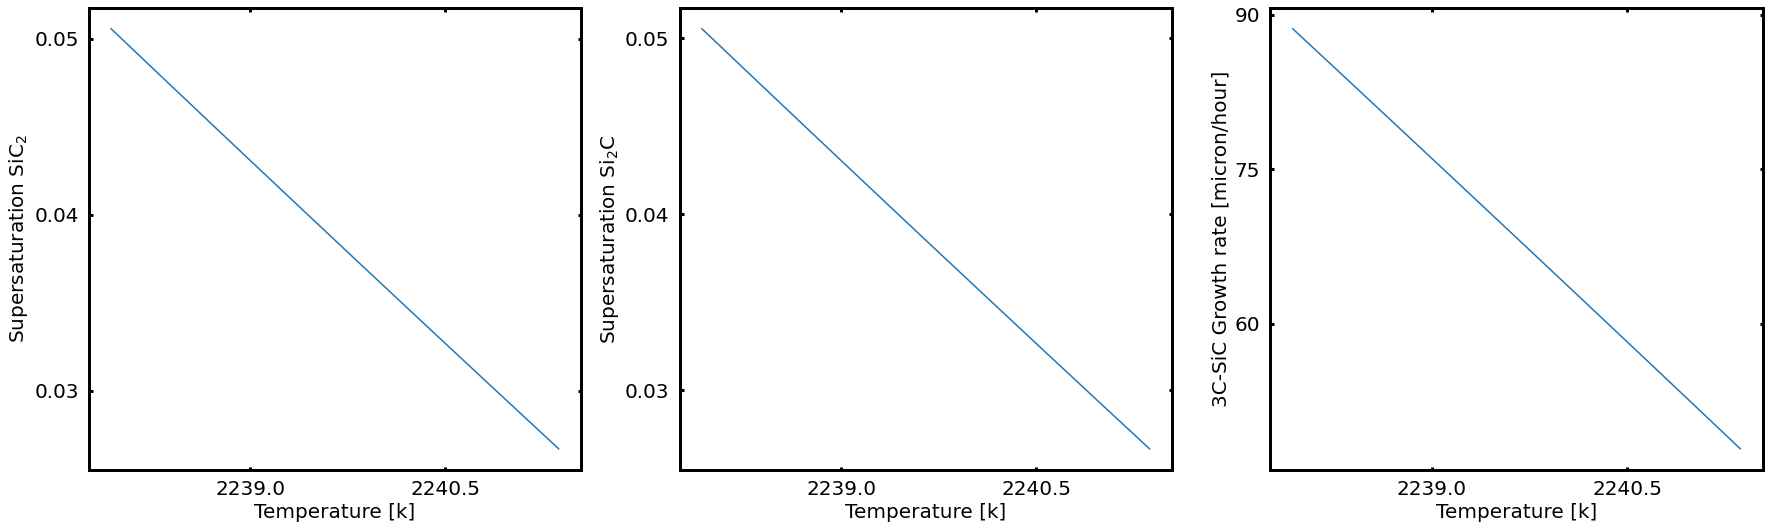

In [9]:
for key in data_samples:
    print('Process ID: {}'.format(key))
    print('The chamber power is: {} kW'.format(data_samples[key]['Power']))
    Tseed_center = data_samples[key]['T_seed_middle'] + T_zero_kelvin + delta_T
    Tseed_edge = data_samples[key]['T_seed_edge'] + T_zero_kelvin + delta_T
    Tsource = (data_samples[key]['T_source_middle'] + data_samples[key]['T_source_edge']) * 0.5 + T_zero_kelvin + delta_T
    print('Seed-middle temperature: {} [K]'.format(Tseed_center))
    print('Seed-edge temperature: {} [K]'.format(Tseed_edge))
    print('Source temperature: {} [K]'.format(Tsource))
    delta_source_seed_center = Tsource - Tseed_center
    print('Source - Seed-center temperature: {} [K]'.format(delta_source_seed_center))
    delta_source_seed_edge = Tsource - Tseed_edge
    print('Source - Seed-edge temperature: {} [K]'.format(delta_source_seed_edge))
    print('')
    data = get_data_avrov_lilov(Tsource,Tseed_center,Tseed_edge)
    for data_name in data_names:
        print('Calibration for vapor pressure: {}'.format(data_name))
        plot_lines(data,data_name)
    print('')
    

## Process window

In [10]:
def z_func(data_name,Tsource_curr,DeltaT_source_seed_center):
    Tsource = Tsource_curr
    Tseed_center = Tsource_curr - DeltaT_source_seed_center
    Tseed_edge = Tsource_curr - DeltaT_source_seed_center * 0.5
    data = get_data_avrov_lilov(Tsource,Tseed_center,Tseed_edge)
    data_to_plot = data[data_name]
    value = data_to_plot[0]['Gr_SiC'] # Growth rate at middle seed position
    return value

In [17]:
def get_two_dimensional_plt(data_name):
    Tsource_start = 1800 + T_zero_kelvin
    Tsource_end = Tsource_start + 200.0 
    Tsource_vect = np.linspace(Tsource_start, Tsource_end, 100)

    Delta_Tsource_Tseed_center_vect = np.linspace(0.0, 50.0, 50)

    Z = np.zeros((len(Tsource_vect),len(Delta_Tsource_Tseed_center_vect)))

    X, Y = np.meshgrid(Tsource_vect, Delta_Tsource_Tseed_center_vect)

    for i in range(len(Tsource_vect)):
        for j in range(len(Delta_Tsource_Tseed_center_vect)):
            Z[i,j] = z_func(data_name,Tsource_vect[i],Delta_Tsource_Tseed_center_vect[j])

    fig = plt.figure(figsize=(20,10))

    im = plt.imshow(Z, cmap=plt.cm.RdBu, extent=(Tsource_start-T_zero_kelvin, Tsource_end-T_zero_kelvin, Delta_Tsource_Tseed_center_vect[0], Delta_Tsource_Tseed_center_vect[-1]))  
    cset = plt.contour(Z, np.arange(100, 301, 50), linewidths=2,
                       cmap=plt.cm.Set2,
                       extent=(Tsource_start-T_zero_kelvin, Tsource_end-T_zero_kelvin, Delta_Tsource_Tseed_center_vect[-1], Delta_Tsource_Tseed_center_vect[0]))
    plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=20)
    cbar=plt.colorbar(im)
    cbar.ax.get_yaxis().labelpad = 50
    cbar.set_label('Growth rate at middle seed [micron/hour]', rotation=270)

    print('Experimental growth rates')
    for key in data_samples:
        Tseed_center_exp = data_samples[key]['T_seed_middle']
        Tsource_exp = (data_samples[key]['T_source_middle'] + data_samples[key]['T_source_edge']) * 0.5
        delta_exp = Tsource_exp - Tseed_center_exp 
        plt.scatter(Tsource_exp,delta_exp,color='red')
        if key == '148':
            plt.text(Tsource_exp-9,delta_exp+1,key,size=20)
        else:
            plt.text(Tsource_exp+1,delta_exp+1,key,size=20)
        print('Process ID {}: {} [micorn/hour]'.format(key,data_samples[key]['Exp-Growth-Rate']))

    plt.xlabel('$T_{source}$ [$^{\circ}$C]', size=25)
    plt.ylabel('$T_{source} - T_{seedmiddle}$ [$^{\circ}$C]', size=30)
    if data_name == 'avrov':
        plt.title('3C-SiC epitaxial growth - Avrov calibrartion', size=30, pad=10)
    elif data_name == 'lilov':
        plt.title('3C-SiC epitaxial growth - Lilov calibrartion', size=30, pad=10)

    plt.show()
    return

Red dots represent the experimental processes.

Experimental growth rates
Process ID 151: 101 [micorn/hour]
Process ID 148: 208 [micorn/hour]
Process ID 149: 230 [micorn/hour]
Process ID 152: 231 [micorn/hour]
Process ID 153: 287 [micorn/hour]


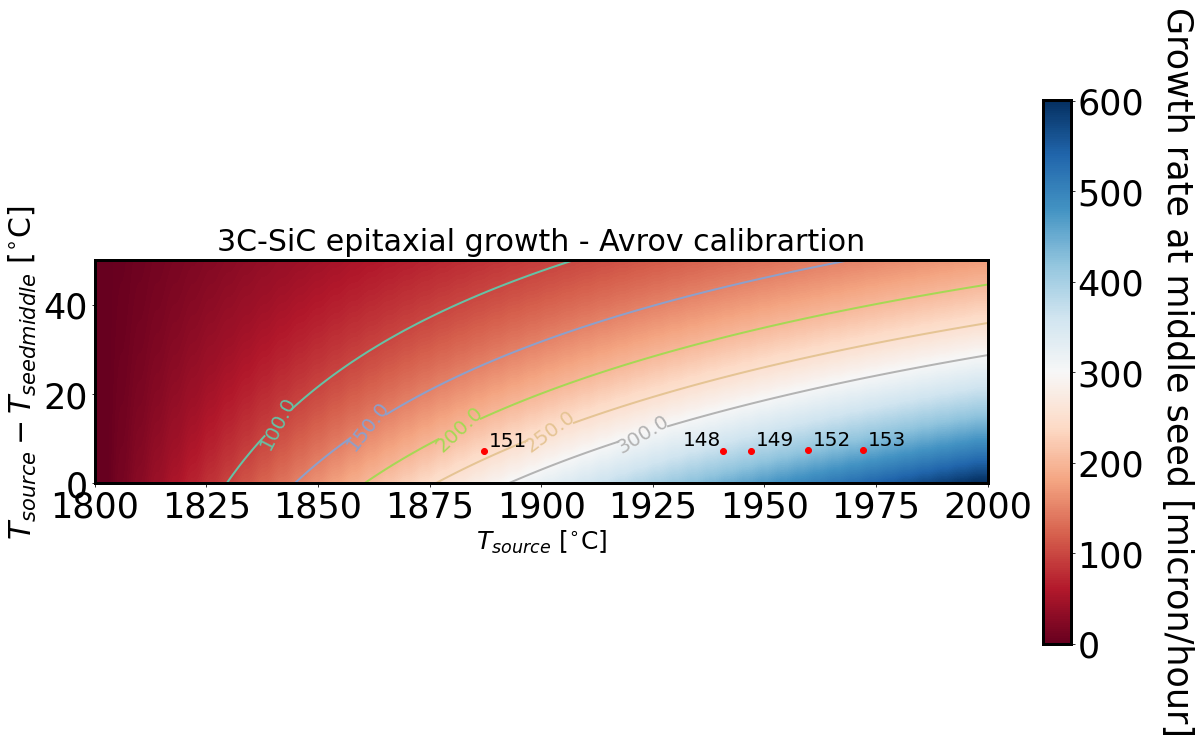

Experimental growth rates
Process ID 151: 101 [micorn/hour]
Process ID 148: 208 [micorn/hour]
Process ID 149: 230 [micorn/hour]
Process ID 152: 231 [micorn/hour]
Process ID 153: 287 [micorn/hour]


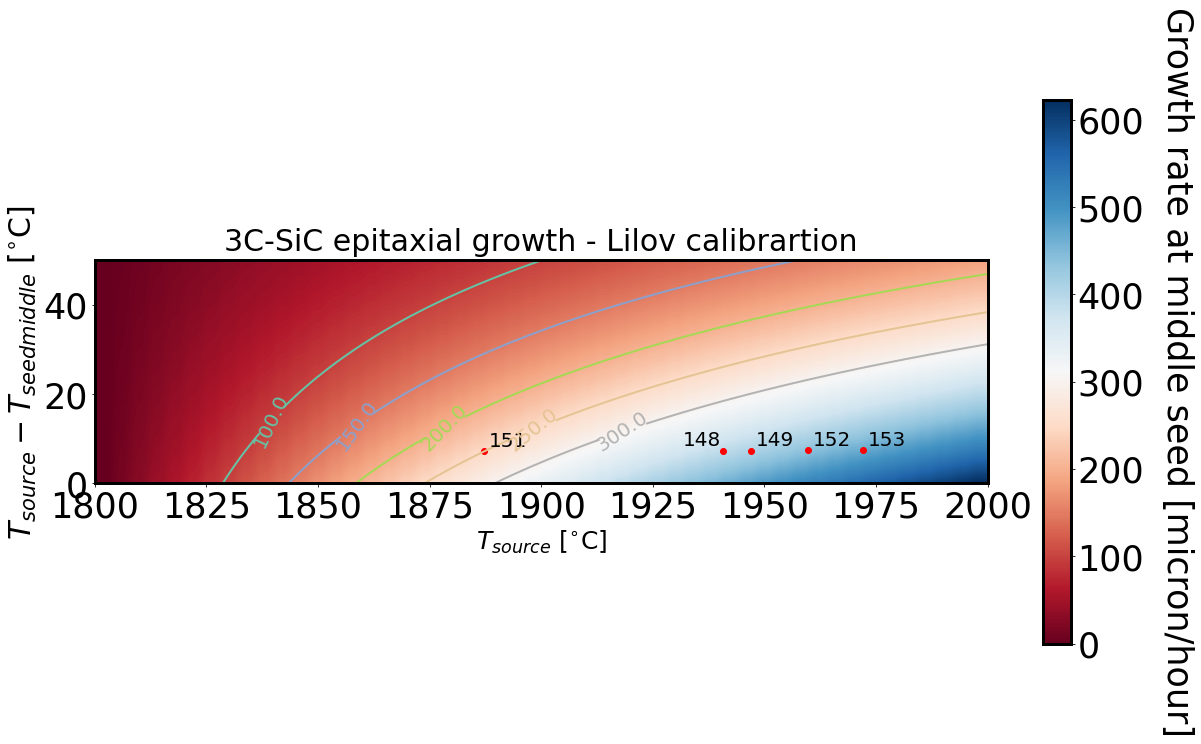

In [18]:
print('Red dots represent the experimental processes.')
print('')
for data_name in data_names:
    get_two_dimensional_plt(data_name)